In [1]:
import sqlite3

# Connect to or create the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Drop old table if it exists (to avoid duplicates)
cursor.execute("DROP TABLE IF EXISTS sales")

# Create new sales table
cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Richer sample data
sample_data = [
    ("Laptop", 3, 800),
    ("Laptop", 2, 800),
    ("Mouse", 15, 25),
    ("Mouse", 12, 25),
    ("Keyboard", 10, 50),
    ("Keyboard", 6, 50),
    ("Monitor", 3, 200),
    ("Monitor", 5, 200),
    ("Headphones", 8, 120),
    ("Webcam", 4, 75),
    ("Webcam", 2, 75),
    ("Chair", 2, 150),
    ("Desk", 1, 300)
]

# Insert new data
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()

print("✅ Rich sales data inserted into database.")


✅ Rich sales data inserted into database.


In [2]:
import pandas as pd

# Reconnect to database
conn = sqlite3.connect("sales_data.db")

# SQL query
query = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity, 
    ROUND(SUM(quantity * price), 2) AS revenue 
FROM sales 
GROUP BY product
"""

# Load into DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Display the result
print("📈 SALES SUMMARY:")
df


📈 SALES SUMMARY:


,product,total_quantity,revenue
0,Chair,2,300.0
1,Desk,1,300.0
2,Headphones,8,960.0
3,Keyboard,16,800.0
4,Laptop,5,4000.0
5,Monitor,8,1600.0
6,Mouse,27,675.0
7,Webcam,6,450.0


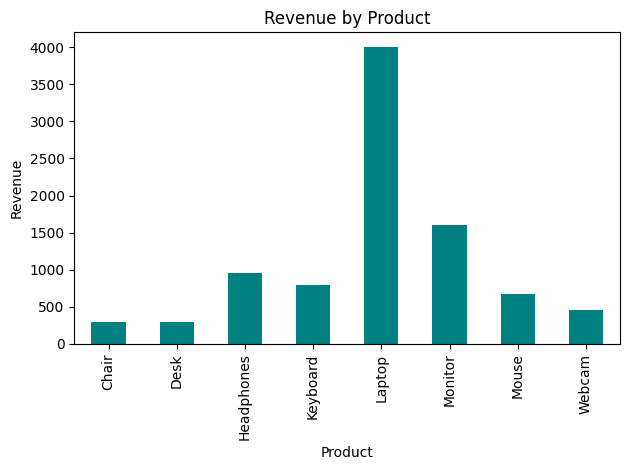

In [12]:
import matplotlib.pyplot as plt

# Plot
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False, color='teal')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")
df = pd.read_sql_query("SELECT * FROM sales", conn)
conn.close()

print(df)


    id     product  quantity  price
0    1      Laptop         3  800.0
1    2      Laptop         2  800.0
2    3       Mouse        15   25.0
3    4       Mouse        12   25.0
4    5    Keyboard        10   50.0
5    6    Keyboard         6   50.0
6    7     Monitor         3  200.0
7    8     Monitor         5  200.0
8    9  Headphones         8  120.0
9   10      Webcam         4   75.0
10  11      Webcam         2   75.0
11  12       Chair         2  150.0
12  13        Desk         1  300.0


In [13]:
import sqlite3
import pandas as pd

# Connect to DB
conn = sqlite3.connect("sales_data.db")

# Correct SQL: SUM of quantity * price = revenue
query = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity, 
    ROUND(SUM(quantity * price), 2) AS revenue 
FROM sales 
GROUP BY product
"""

# Run query
df = pd.read_sql_query(query, conn)
conn.close()

# Confirm the structure
print(df.columns)
df.head()


Index(['product', 'total_quantity', 'revenue'], dtype='object')


,product,total_quantity,revenue
0,Chair,2,300.0
1,Desk,1,300.0
2,Headphones,8,960.0
3,Keyboard,16,800.0
4,Laptop,5,4000.0


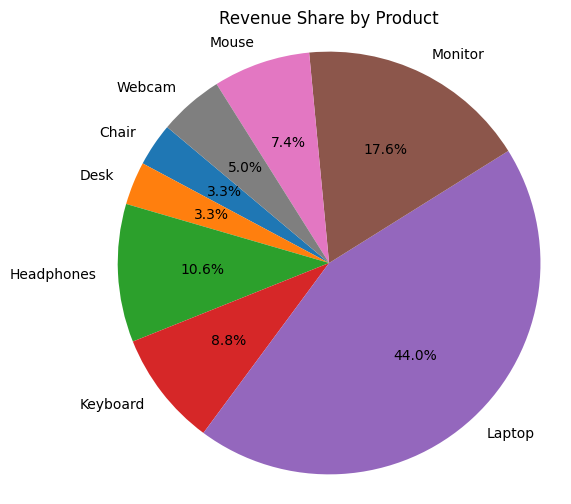

In [16]:
plt.figure(figsize=(6, 6))
plt.pie(df['revenue'], labels=df['product'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Share by Product')
plt.axis('equal')
plt.show()
